In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

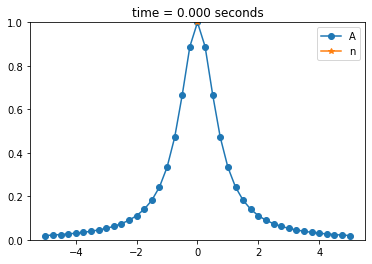

In [7]:
def f(x):
    return 1 + 12 * x * x
def u0(x):
    return 1.0 / (1 + 2 * x * x)

C = 1.0
T = 2.0
L, R = -5.0, 5.0

n = 40
m = 40
h = (R - L) / n
tau = T / m
x = np.linspace(L, R, n + 1)
t = np.linspace(0.0, T, m + 1)
y = np.zeros((m + 1, n + 1))
d = C * tau / h
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n + 1):
        y[k + 1][i] = y[k][i] - d * (y[k][i] - y[k][i - 1])

def solution(x, t):
    return f(x - C * t)

vsolution = np.vectorize(solution, excluded = ['t'])
u = np.zeros((m + 1, n + 1))

for k in range(m):
    u[k] = vsolution(x, tau * k)
s = ""

def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title(f"time = {(tau * k):0.3f} seconds")
    plt.plot(x, y[k], marker = 'o')
    plt.legend("Numerical")
    plt.plot(x, u[k], marker = '*')
    plt.legend("Analytical")

ani = animation.FuncAnimation(plt.figure(0), animate, frames = y.shape[0], interval = 100)
ani.save('transfer.mp4')
plt.show()